<a href="https://colab.research.google.com/github/vamshikondisetti/Assignment/blob/Excler_Assignments/Assignment_18_Forecasting_Airlines%2BData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('Airlines+Data.xlsx')
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

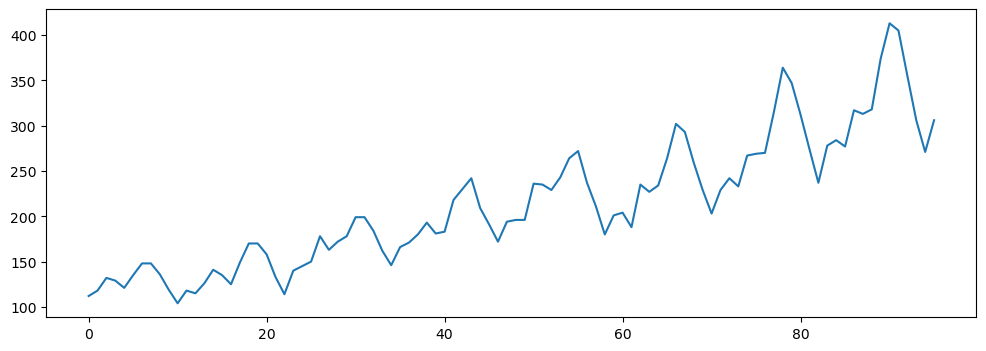

In [ ]:
df.Passengers.plot(figsize=(12,4));

In [ ]:
print('Shape of the data', df.shape)

Shape of the data (96, 2)


In [ ]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [ ]:
df.nunique()

Month         96
Passengers    80
dtype: int64

In [ ]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


# Feature Engineering

In [ ]:
df.rename({'Month':'Date'}, axis=1, inplace=True)

In [ ]:
airline = df.copy()
airline.set_index('Date', inplace=True)
airline.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [ ]:
airline.head()


,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [ ]:
df["Date"]  = pd.to_datetime(df.Date, format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"]  = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Date,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
5,1995-06-01,135,Jun,1995
6,1995-07-01,148,Jul,1995
7,1995-08-01,148,Aug,1995
8,1995-09-01,136,Sep,1995
9,1995-10-01,119,Oct,1995


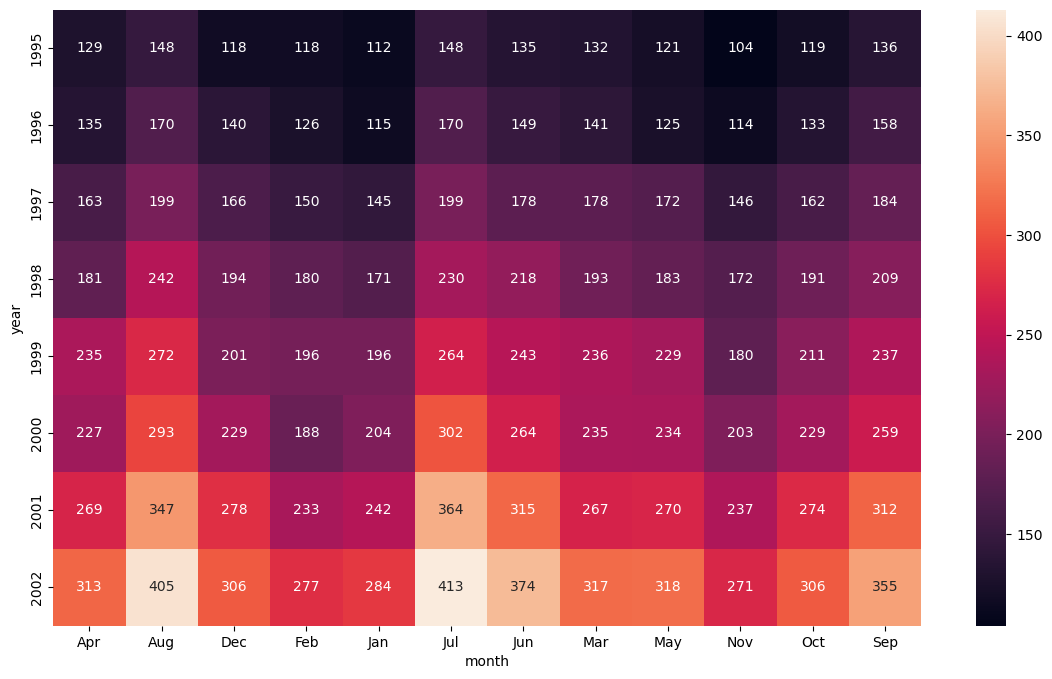

In [ ]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.show()

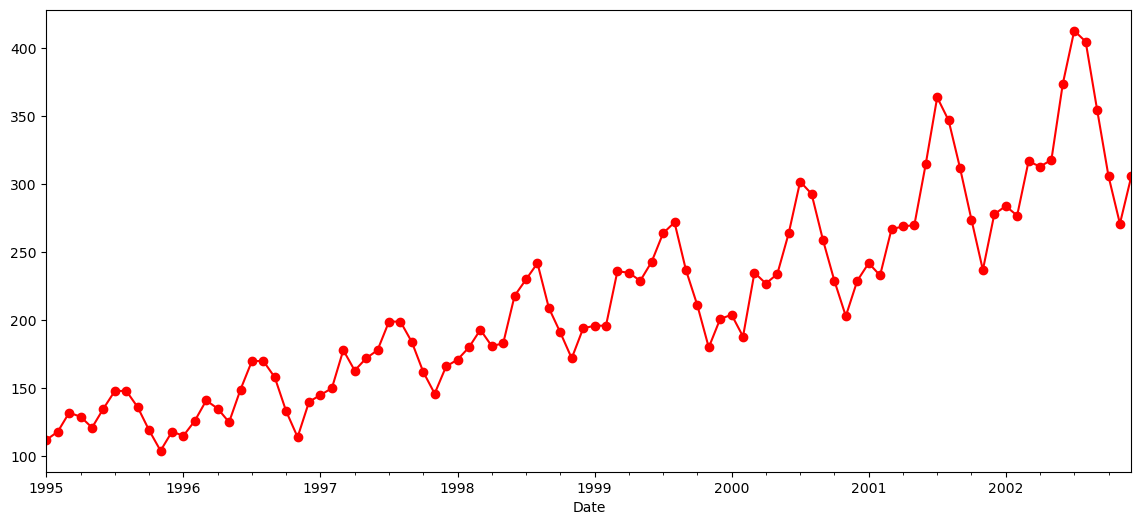

In [ ]:
airline['Passengers'].plot(figsize=(14,6),color='red',marker='o')
plt.show()

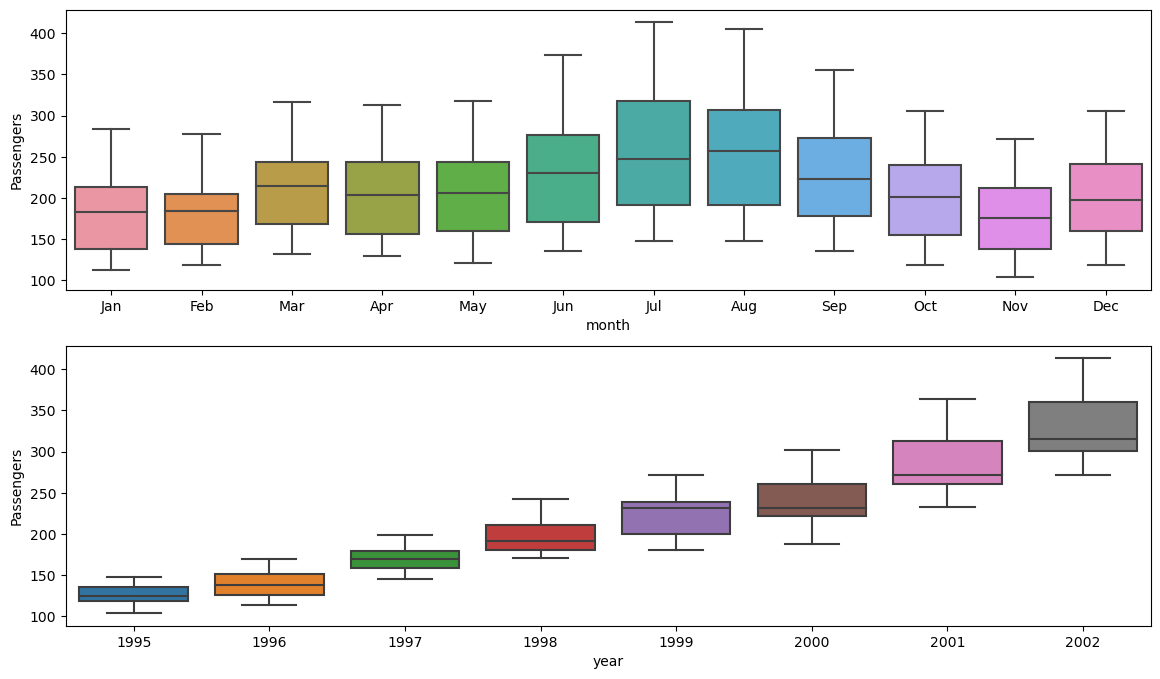

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month", y="Passengers", data=df)
plt.subplot(212)
sns.boxplot(x="year", y="Passengers", data=df)
plt.show()

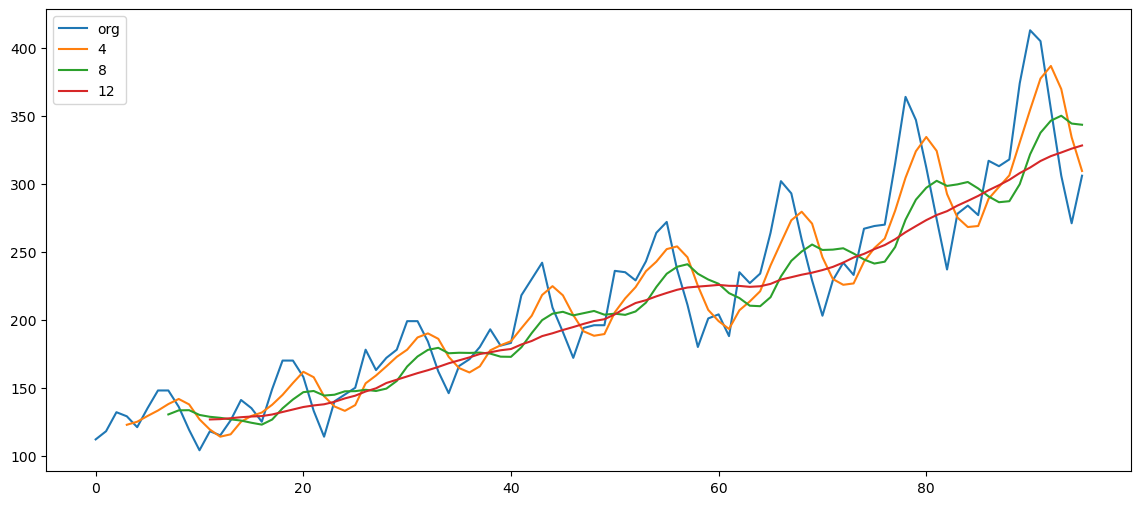

In [ ]:
plt.figure(figsize=(14,6))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

# ACF plots and PACF plots
Autocorrelation Function (ACF)

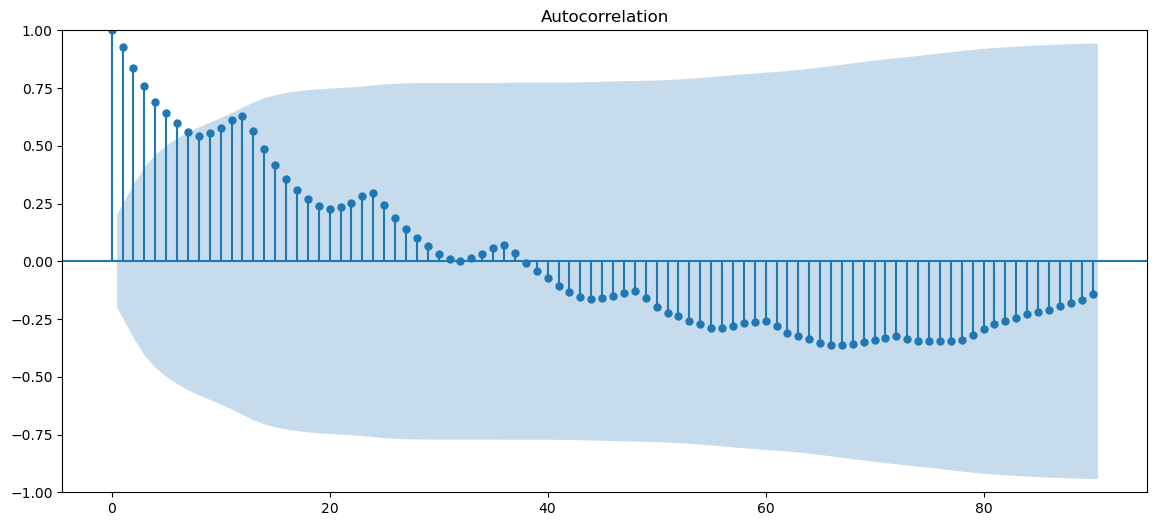

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    tsa_plots.plot_acf(df.Passengers, lags=90)
    plt.show()

D:\anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


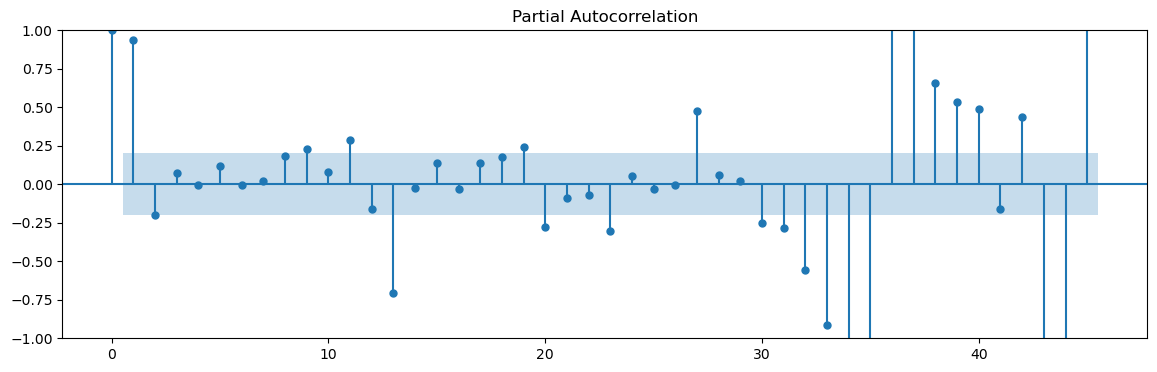

In [ ]:
#Partial Autocorrelation Function (PACF)

import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_pacf(df.Passengers,lags=45)
    plt.show()

D:\anaconda\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


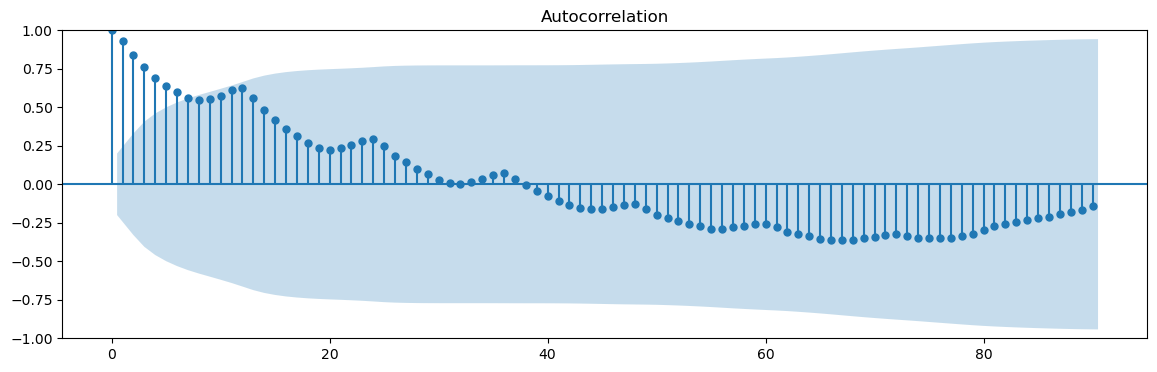

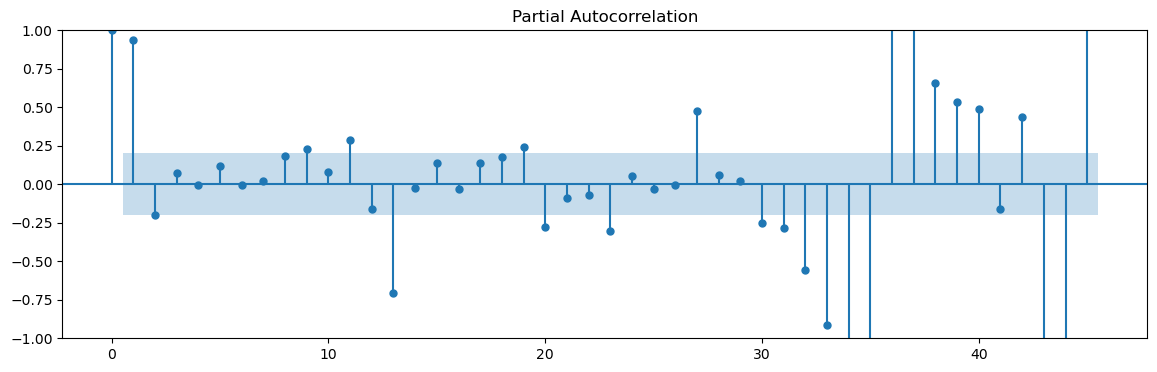

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(14,4))
    tsa_plots.plot_acf(df.Passengers,lags=90)
    tsa_plots.plot_pacf(df.Passengers,lags=45)
    plt.show()

In [ ]:
visual = airline.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['Date'])
visual['year'] = visual['Date'].dt.year
visual['month'] = visual['Date'].dt.month
visual['week'] = visual['Date'].dt.isocalendar().week
visual['quarter'] = visual['Date'].dt.quarter
visual['day_of_week'] = visual['Date'].dt.day_name()
visual.drop('Date', axis =1 , inplace= True)
visual.head(10)

,Passengers,date,year,month,week,quarter,day_of_week
0,112,1995-01-01,1995,1,52,1,Sunday
1,118,1995-02-01,1995,2,5,1,Wednesday
2,132,1995-03-01,1995,3,9,1,Wednesday
3,129,1995-04-01,1995,4,13,2,Saturday
4,121,1995-05-01,1995,5,18,2,Monday
5,135,1995-06-01,1995,6,22,2,Thursday
6,148,1995-07-01,1995,7,26,3,Saturday
7,148,1995-08-01,1995,8,31,3,Tuesday
8,136,1995-09-01,1995,9,35,3,Friday
9,119,1995-10-01,1995,10,39,4,Sunday


In [ ]:
visual.year.unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002], dtype=int64)

# Time Series Decomposition
1. Seasonality
2. Trend
Additive Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

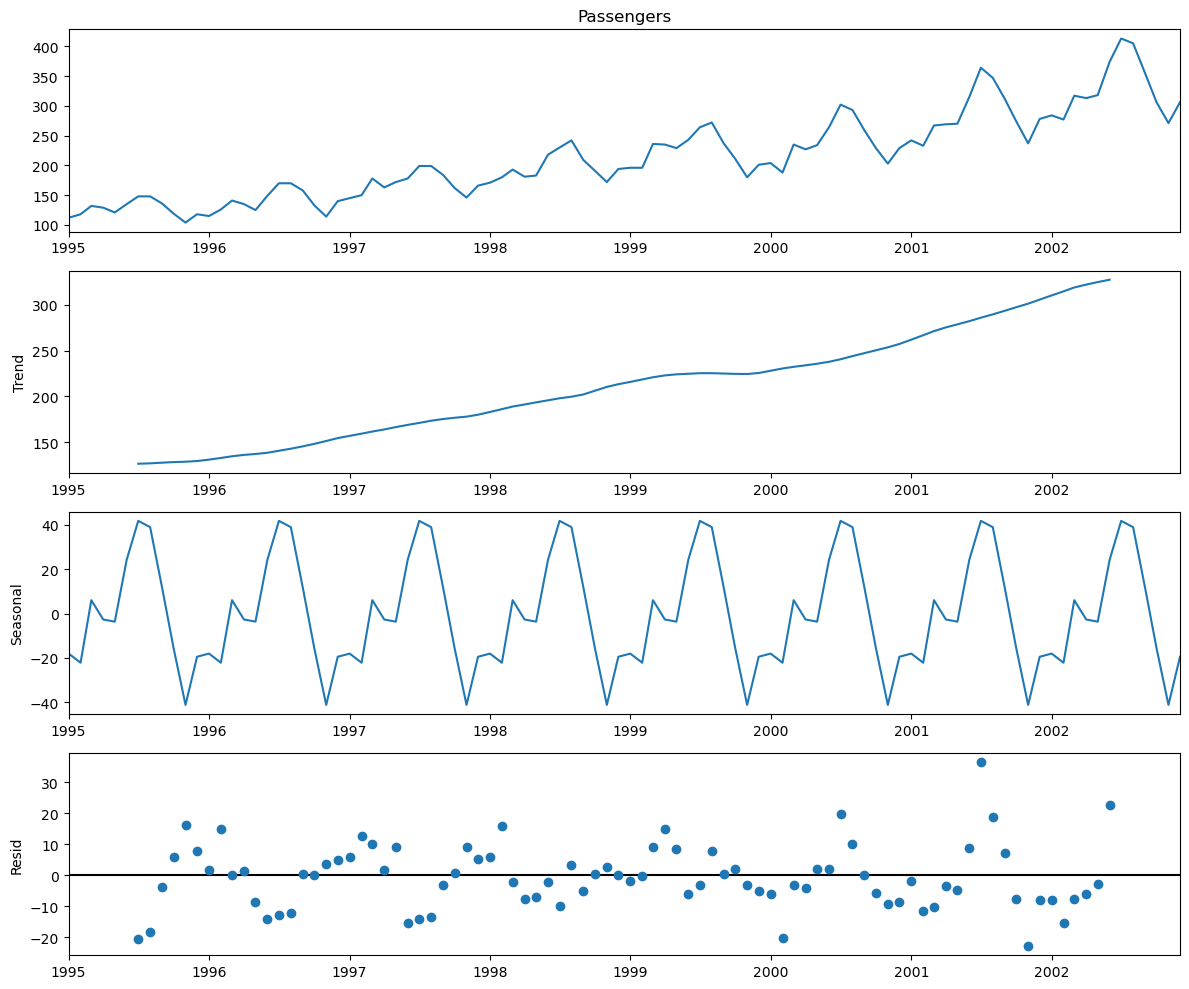

In [ ]:
decompose_ts_add = seasonal_decompose(airline.Passengers, period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

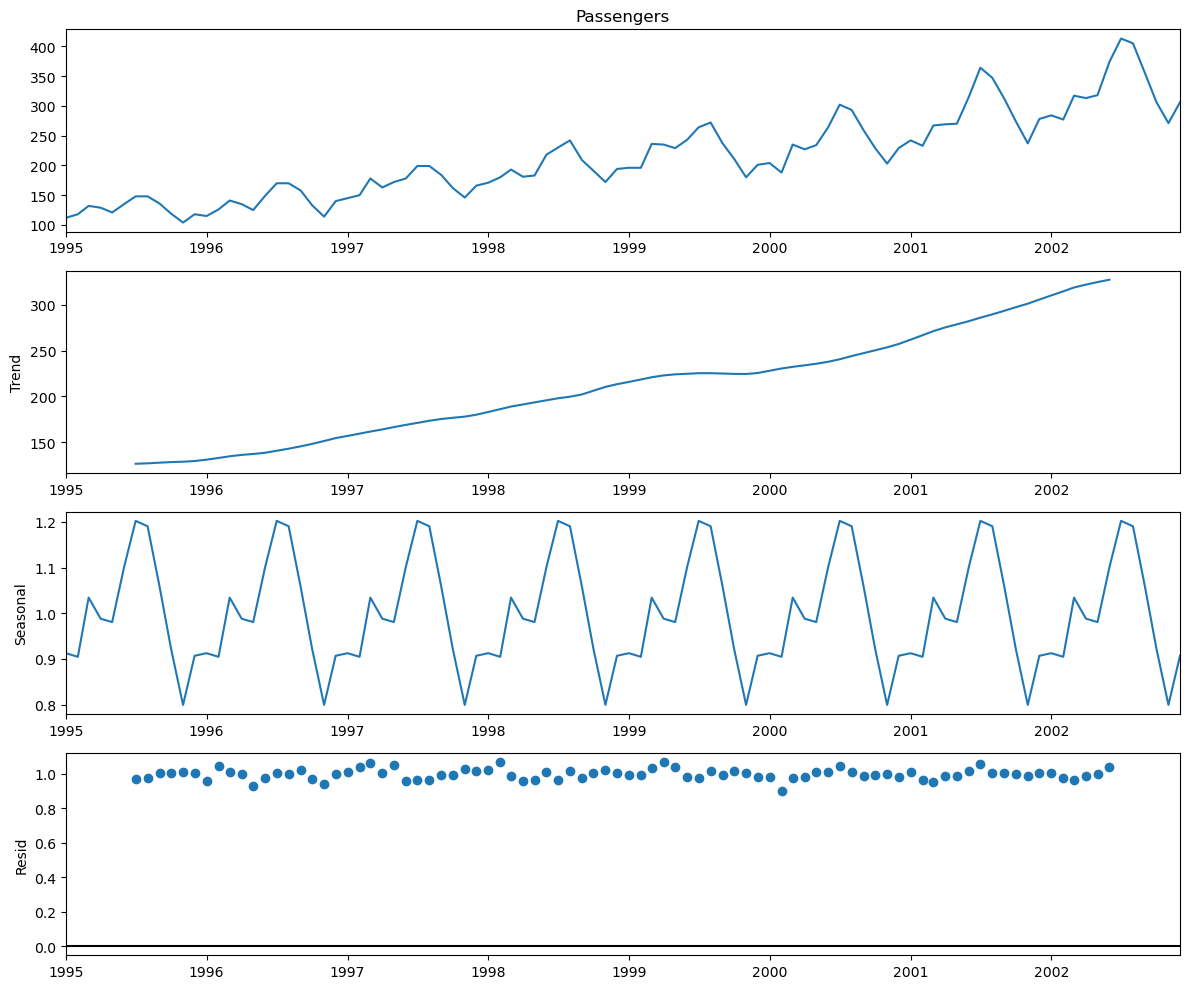

In [ ]:
decompose_ts_add = seasonal_decompose(airline.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(12,10))
    decompose_ts_add.plot()
    plt.show()

# Splitting Train and Test Data
Leaving Test Data with 2 Years of Time Series

In [ ]:
size = 72
train_data = airline[:size]
test_data = airline[size:]

In [ ]:
train_data.shape

(72, 1)

In [ ]:
test_data.shape

(24, 1)

In [ ]:
print('Train:',train_data.index.min(),train_data.index.max(),'\n',
'Test:',test_data.index.min(),test_data.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00 
 Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


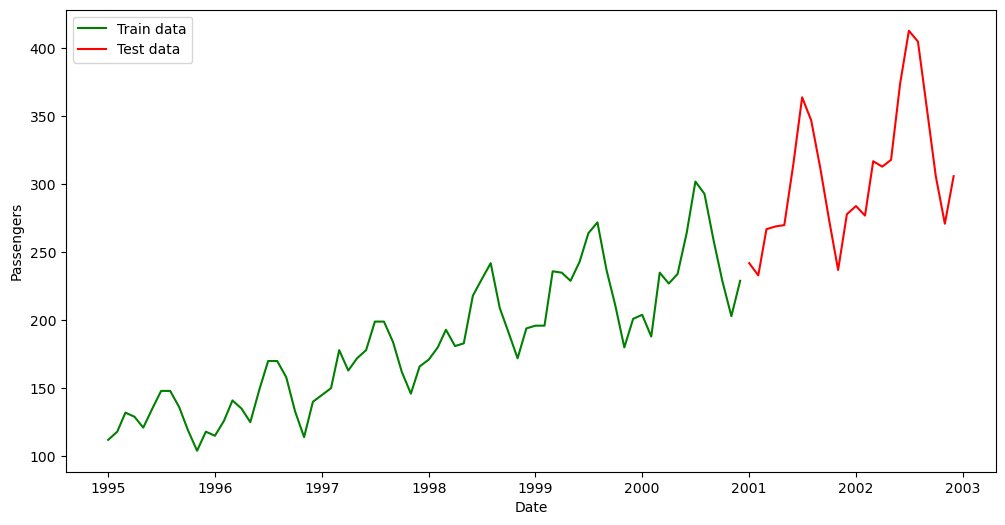

In [ ]:
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'red', label='Test data')
plt.legend()
plt.show()

# Exponential Methods
Simple Exponential Method
Using Forecast Attribute

In [ ]:
# Evaluation Metric MAPE
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
ses_model = SimpleExpSmoothing(train_data['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_data.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_data))
mape_ses = MAPE(test_pred_ses,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 23.38228335004472 
 Train Root Mean Squared Error = 19.031771730910982 
 Test Root Mean Squared Error  = 91.11325402904403


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


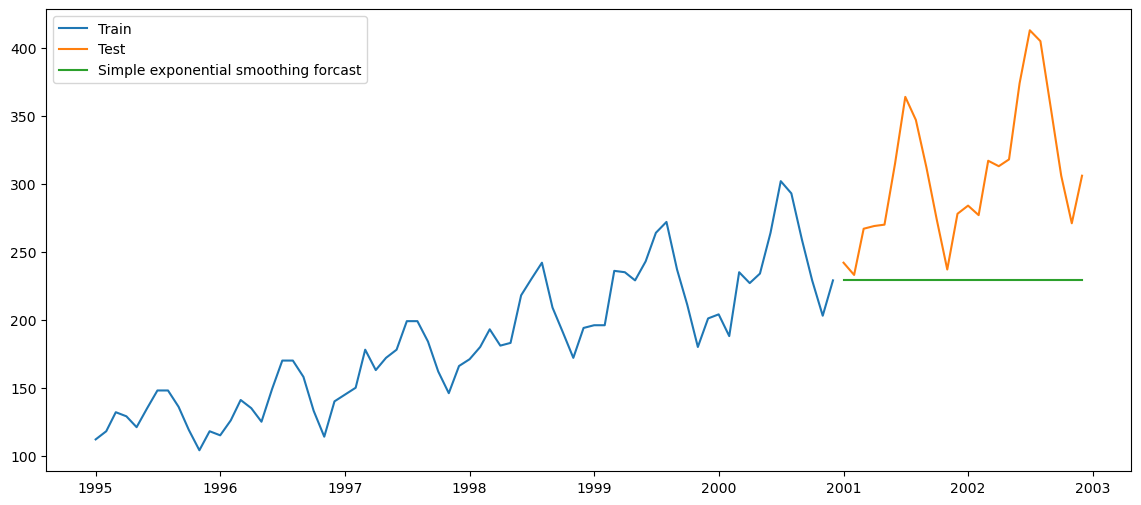

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Observation
1> No seasonality captures.
2> Most recent observation gets higher weightages than the older ones for forecasting.

# Holt method (Double Exponential)
Captures both Level and Trend

In [ ]:
from statsmodels.tsa.holtwinters import Holt

In [ ]:
dexp_model  = Holt(train_data).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_data.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_data))
mape_dexp = MAPE(test_pred_dexp,test_data.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
'Mean Absolute Percent Error   = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error  = {}'.format(test_rmse_dexp))

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Simple Exponential Method Evaluation 
 Mean Absolute Percent Error   = 17.148981696358685 
 Train Root Mean Squared Error = 18.96128999459111 
 Test Root Mean Squared Error  = 71.63464300883933


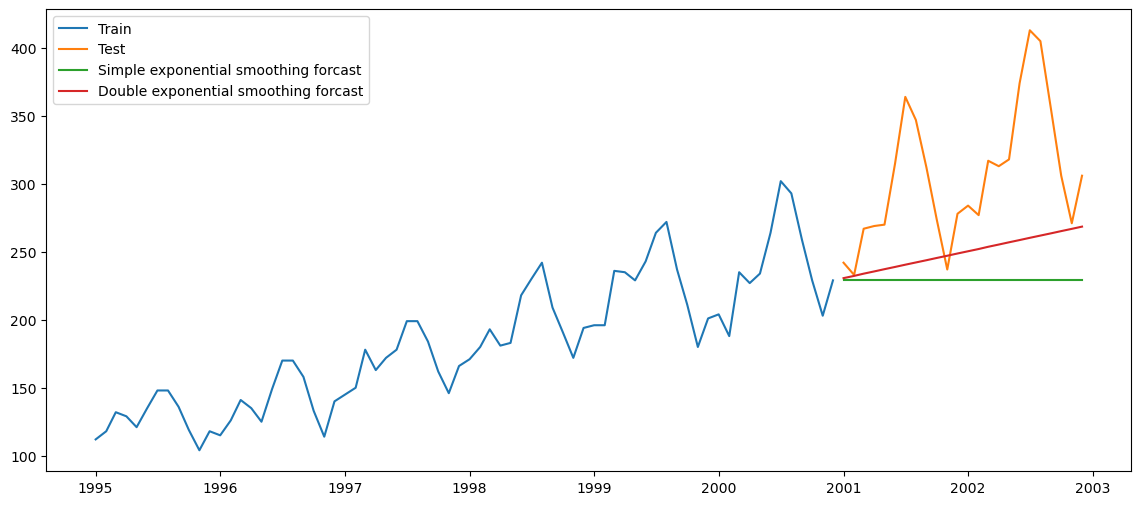

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

# Autoregressive Integrated Moving Averages (ARIMA)

# Stationary vs Non-stationary Time Series
Test of Stationarity
As we have yearly data the window size for moving average is equal to 12

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):

    # Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)

    # Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

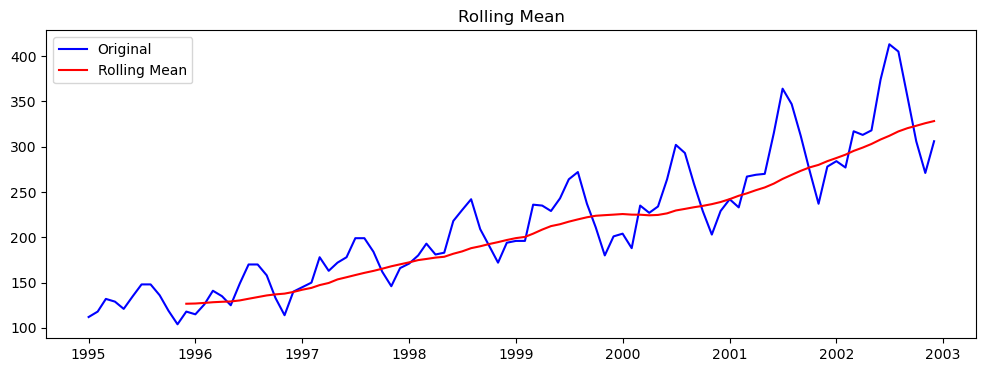

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
sales= pd.DataFrame()
sales['Passengers'] = airline[['Passengers']]
test_stationarity(sales)

In [ ]:
def adf_test(series):
    result = adfuller(series.dropna())
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
adf_test(sales)


Fail to reject the null hypothesis
Data is non-stationary


# Feature Scaling (Transformations)
1. Square Root Transform

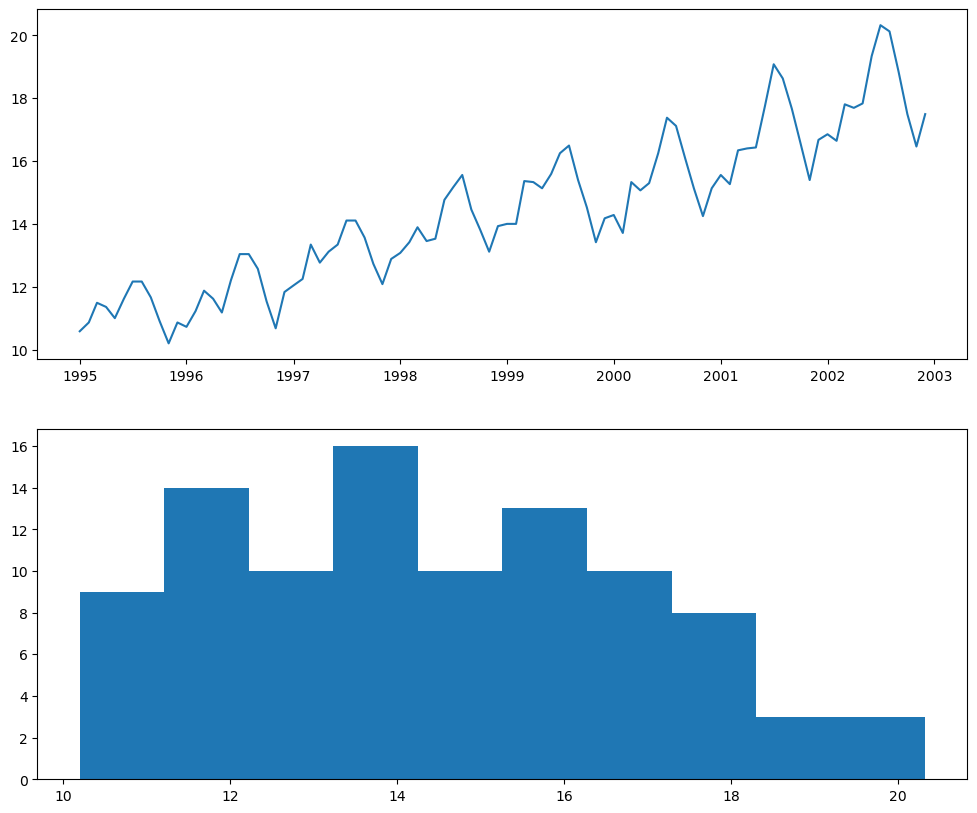

In [ ]:
square_root= pd.DataFrame()
square_root = airline[['Passengers']]
square_root['Passengers'] = np.sqrt(square_root.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(square_root['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(square_root['Passengers'])
plt.show()

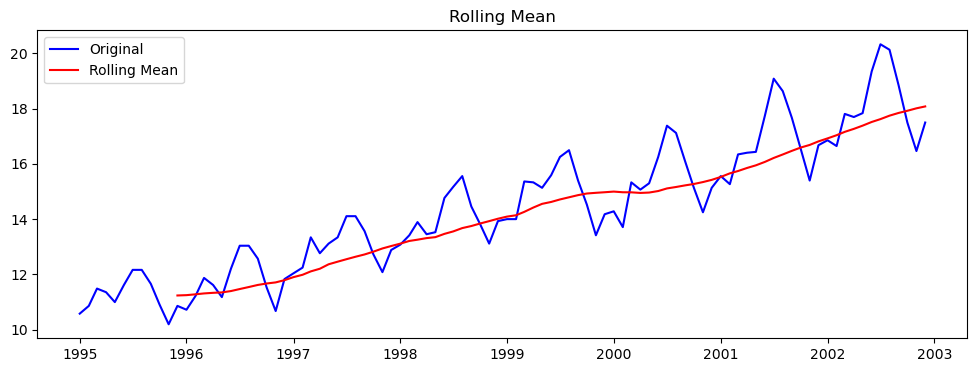

Results of Dickey Fuller Test:
Test Statistic                  0.451435
p-value                         0.983320
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(square_root)

# 2. Log Transform

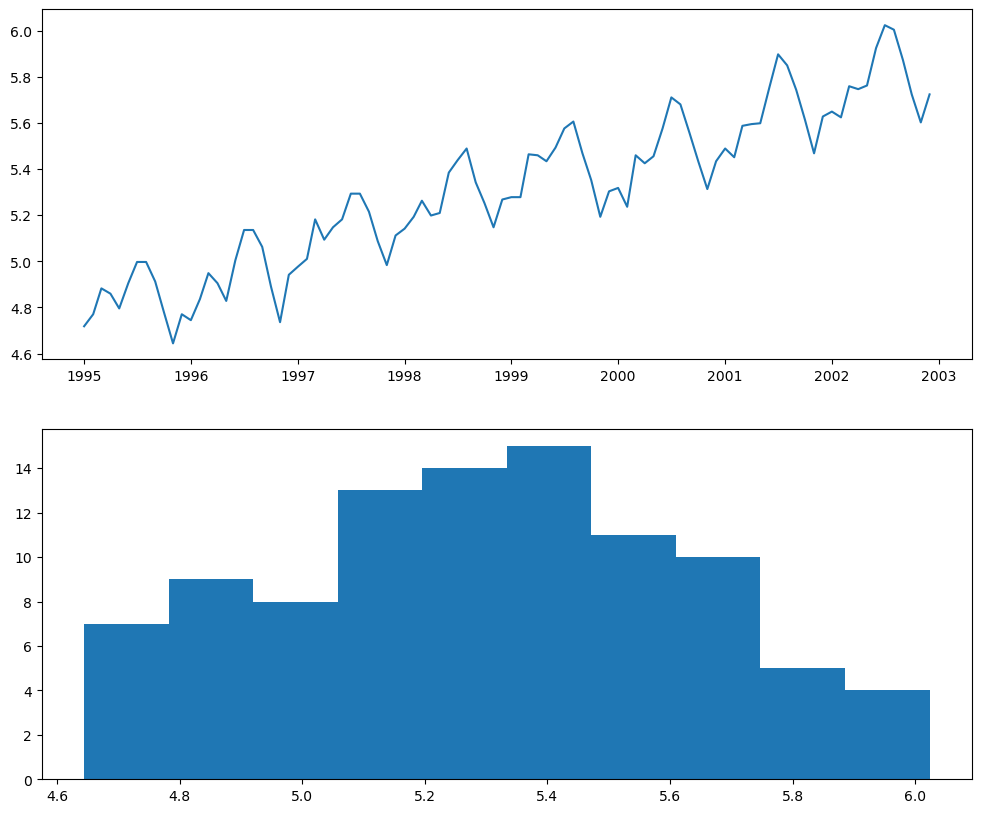

In [ ]:
log = pd.DataFrame()
log = airline[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig = plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

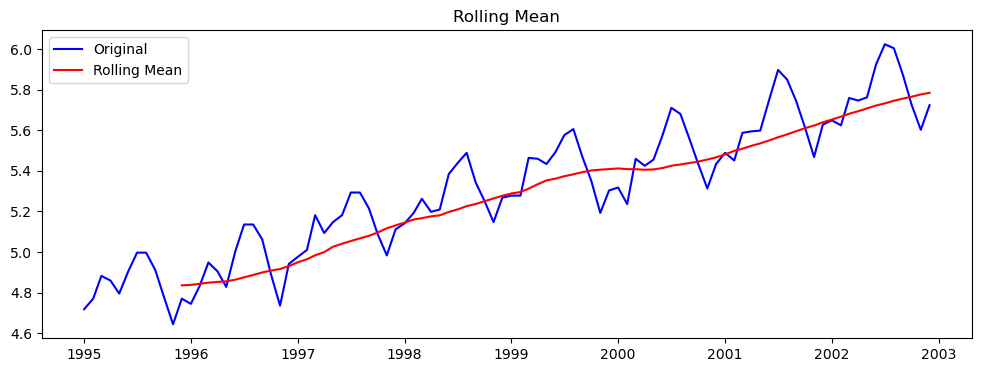

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [ ]:
plt.figure(figsize=(12,4))
test_stationarity(log)

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
import statsmodels.api as sm

In [ ]:
airline

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
# prepare data
X = airline.values
X = X.astype('float32')

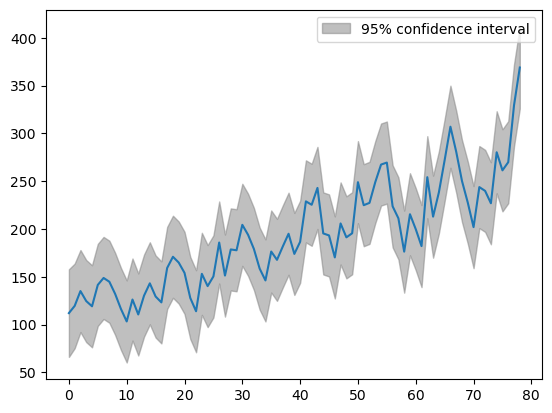

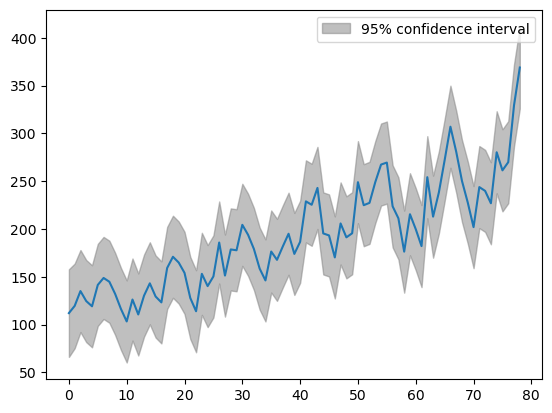

In [ ]:
# fit model
model = sm.tsa.arima.ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)
plot_predict(model_fit,1,79)

# Combine train and test data and build final model

In [ ]:
size = 72
train_data = airline[:size]
test_data = airline[size:]

In [ ]:
model = sm.tsa.arima.ARIMA(train_data, order=(4,1,0))
model_fit = model.fit()

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


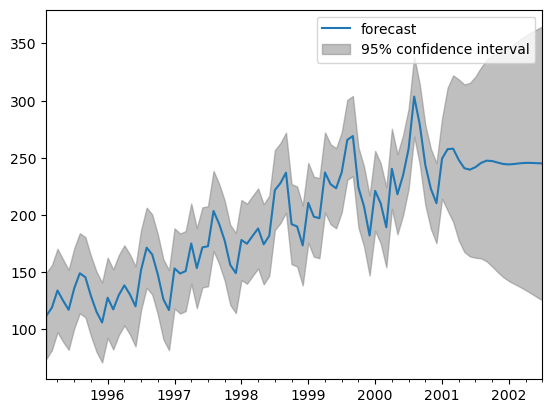

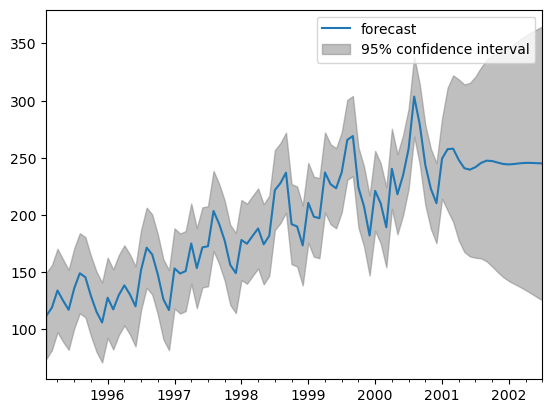

In [ ]:
#forecast=model_fit.forecast(steps=10)[0]
plot_predict(model_fit,1,90)